In [88]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import preprocessing


mu, sigma = 1, 1
s = np.random.default_rng().normal(mu, sigma, 1000)
# s[0]

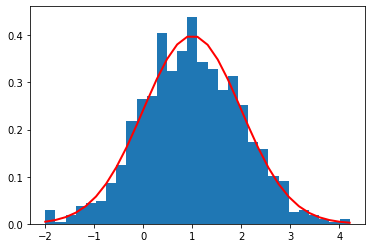

In [89]:
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

# Generating random player stats

Will use generator from numpy that creates a normally distributed list of numbers. Each index correspondes to a specific player's stats.

Assume all players have played ~100 games

I.e kills[5] corresponds to player 5's average kill per game

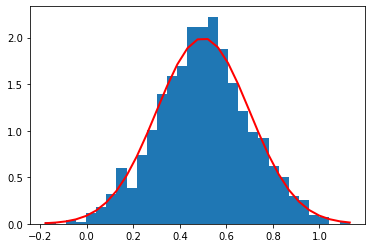

In [90]:
player_numbers = [i for i in range(1000)]

kills_mean = 2
kills_std = 2
kills = abs(np.random.default_rng().normal(kills_mean, kills_std, 1000))


damage_mean = 600
damage_std = 200
damage = abs(np.random.default_rng().normal(damage_mean, damage_std, 1000))
damage_norm = preprocessing.normalize([damage])

skill_mu = 0.5
skill_sigma = 0.2
skill_level = np.random.default_rng().normal(0.5, 0.2, 1000)

count, bins, ignored = plt.hist(skill_level, 30, density=True)
plt.plot(bins, 1/(skill_sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - skill_mu)**2 / (2 * skill_sigma**2) ),
         linewidth=2, color='r')
plt.show()


# Create player data frame 

In [91]:
player_stats = pd.DataFrame({
    'kills_per_game': kills,
    'damage_per_game': damage
},  index=player_numbers)

player_stats.head(10)

,kills_per_game,damage_per_game
0,2.495069,510.048941
1,3.342100,528.432051
2,0.774721,440.963679
3,2.397599,497.821689
4,0.827048,842.236519
5,1.869690,751.562980
6,2.849856,385.400685
7,0.378227,779.045127
8,4.221785,844.727053
9,2.808963,676.098911


In [93]:
scaler = preprocessing.MinMaxScaler()
names=player_stats.columns
d = scaler.fit_transform(player_stats)
# print(d)

player_stats_norm = pd.DataFrame(d, columns=names)
player_stats_norm.head(10)

,kills_per_game,damage_per_game
0,0.245445,0.390890
1,0.328803,0.405404
2,0.076143,0.336344
3,0.235853,0.381236
4,0.081293,0.653165
5,0.183901,0.581574
6,0.280360,0.292475
7,0.037124,0.603273
8,0.415374,0.655131
9,0.276336,0.521993


In [96]:
player_stats_norm['player_skill'] = (player_stats_norm.kills_per_game + player_stats_norm.damage_per_game) / (len(player_stats_norm.columns) - 1)
player_stats_norm.head()

,kills_per_game,damage_per_game,player_skill
0,0.245445,0.390890,0.318167
1,0.328803,0.405404,0.367103
2,0.076143,0.336344,0.206244
3,0.235853,0.381236,0.308544
4,0.081293,0.653165,0.367229
